### 1) What regularization techniques were mentioned in that (ch5) Jupyter notebook?
- L2 ridge - 1/n sum(yi-ŷi)^2 + λsum(wi^2)
- L1 lasso - 1/n sum(yi-ŷi)^2 + λsum(|wi|)
- L1/L2 elastic net - 1/n sum(yi-ŷi)^2 + λ((1-α)sum(|wi|) + αsum(wi^2))
- dropout
- shallower netwok

### 2) The MNIST dataset has 60,000 training images and 10,000 test images. Each image is a 28x28 array, where each array element is between 0 and 255. The images have 10 labels: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
#### First, randomly pair up the training images of label 0 with the training images of label 1, to get about 6,000 such pairs
#### Then, for each pair (A,B) create a new image of size 28x28, where each element's value is the "average" of the two corresponding pixel values in A and B and give it label 0
#### Do this again for the test data
#### (2,3)->1
#### (4,5)->2
#### (6,7)->3
#### (8,9)->4

random image from train data: 9


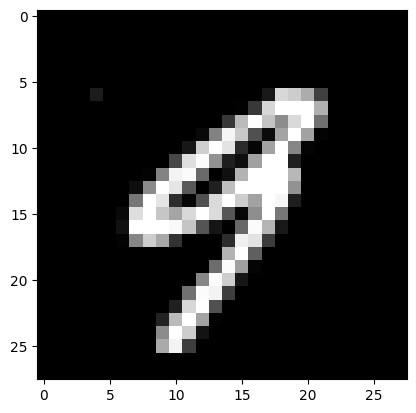

(0,1)->0


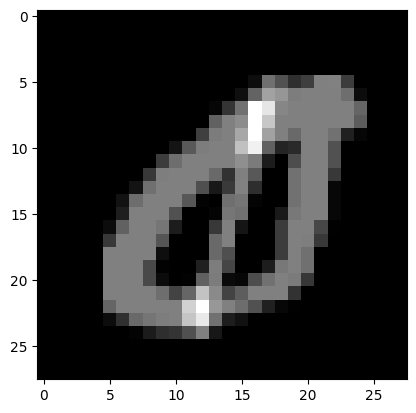

(2,3)->1


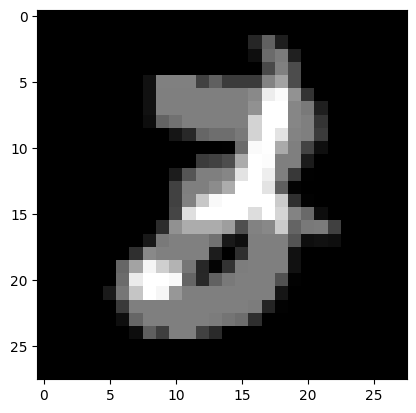

(4,5)->2


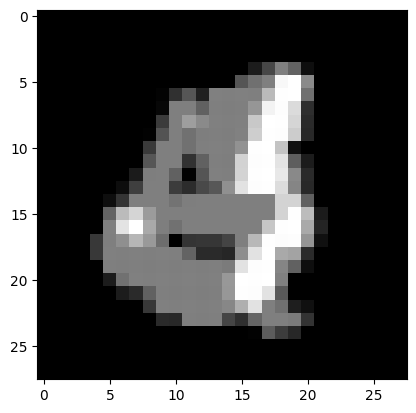

(6,7)->3


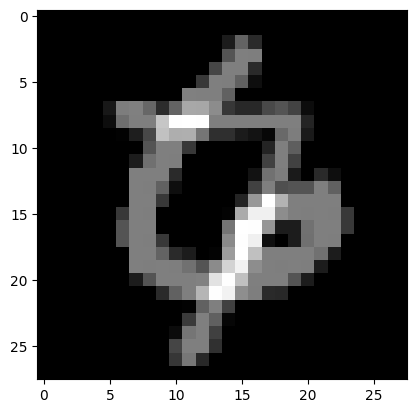

(8,9)->4


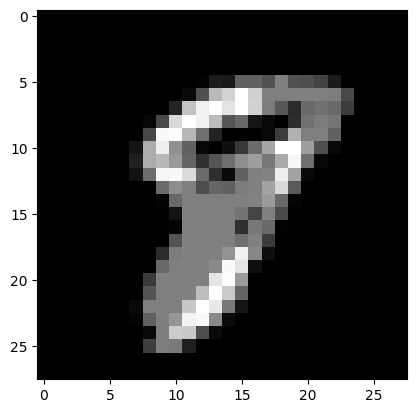

(0,1)->0


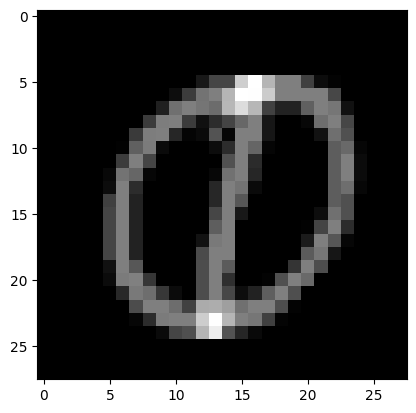

(2,3)->1


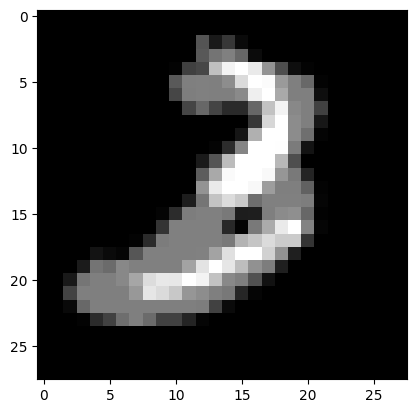

(4,5)->2


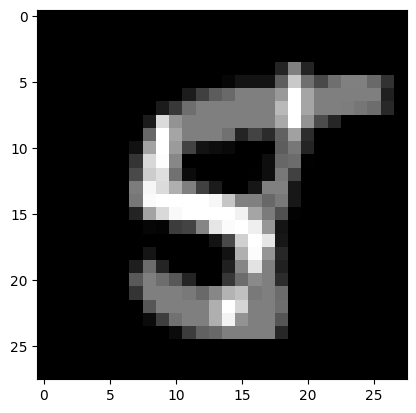

(6,7)->3


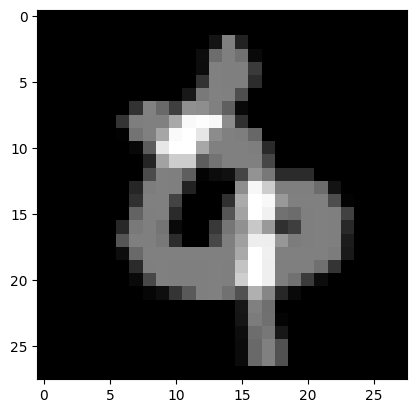

(8,9)->4


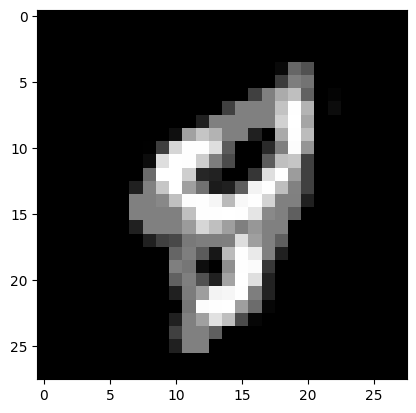

train len 29066 test len 4809


In [146]:
import torch
import torchvision
import random
import matplotlib.pyplot as plt
GRADED = True

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])
train = torchvision.datasets.MNIST(root='../DL_data', train=True, download=True, transform=transform)
test = torchvision.datasets.MNIST(root='../DL_data', train=False, download=True, transform=transform)

def data_parse(data):
    D = {}
    # separate data by label
    for i in range(10):
        D[i] = []
    for i in range(len(data)):
        D[data[i][1]].append(data[i][0])
    

    out = {}
    for i in range(5):
        out[i] = []
    # empty D and create new data and labels
    p = True
    while D[0] and D[1]:
        out[0].append((D[0].pop(random.randint(0, len(D[0])-1)) + D[1].pop(random.randint(0, len(D[1])-1)))/2)
        if GRADED and p:
            print('(0,1)->0')
            plt.imshow(((D[0].pop(random.randint(0, len(D[0])-1)) + D[1].pop(random.randint(0, len(D[1])-1)))/2)[0], cmap='gray')
            plt.show()
            p = False
    p = True
    while D[2] and D[3]:
        out[1].append((D[2].pop(random.randint(0, len(D[2])-1)) + D[3].pop(random.randint(0, len(D[3])-1)))/2)
        if GRADED and p:
            print('(2,3)->1')
            plt.imshow(((D[2].pop(random.randint(0, len(D[2])-1)) + D[3].pop(random.randint(0, len(D[3])-1)))/2)[0], cmap='gray')
            plt.show()
            p = False
    p = True
    while D[4] and D[5]:
        out[2].append((D[4].pop(random.randint(0, len(D[4])-1)) + D[5].pop(random.randint(0, len(D[5])-1)))/2)
        if GRADED and p:
            print('(4,5)->2')
            plt.imshow(((D[4].pop(random.randint(0, len(D[4])-1)) + D[5].pop(random.randint(0, len(D[5])-1)))/2)[0], cmap='gray')
            plt.show()
            p = False
    p = True
    while D[6] and D[7]:
        out[3].append((D[6].pop(random.randint(0, len(D[6])-1)) + D[7].pop(random.randint(0, len(D[7])-1)))/2)
        if GRADED and p:
            print('(6,7)->3')
            plt.imshow(((D[6].pop(random.randint(0, len(D[6])-1)) + D[7].pop(random.randint(0, len(D[7])-1)))/2)[0], cmap='gray')
            plt.show()
            p = False
    p = True
    while D[8] and D[9]:
        out[4].append((D[8].pop(random.randint(0, len(D[8])-1)) + D[9].pop(random.randint(0, len(D[9])-1)))/2)
        if GRADED and p:
            print('(8,9)->4')
            plt.imshow(((D[8].pop(random.randint(0, len(D[8])-1)) + D[9].pop(random.randint(0, len(D[9])-1)))/2)[0], cmap='gray')
            plt.show()
            p = False

    # collect the new data
    new_data = []
    for k,l in out.items():
        for v in l:
            new_data.append([v, k])

    return new_data

print('random image from train data: ',end='')
r = random.randint(0, len(train))
print(train[r][1])
plt.imshow(train[r][0][0], cmap='gray')
plt.show()

data_train = data_parse(train)
data_test = data_parse(test)

print('train len', len(data_train), 'test len', len(data_test))

In [ ]:
from torch.utils.data import DataLoader, random_split

data_train, data_valid = random_split(data_train, [int(0.8*len(data_train)), len(data_train)-int(0.8*len(data_train))])
train_loader = DataLoader(data_train, batch_size=64, shuffle=True)
valid_loader = DataLoader(data_valid, batch_size=64, shuffle=True)
test_loader = DataLoader(data_test, batch_size=64, shuffle=True)

  0%|          | 0/25 [00:00<?, ?it/s]

100%|██████████| 25/25 [06:21<00:00, 15.28s/it]


100%|██████████| 25/25 [06:21<00:00, 15.27s/it]


100%|██████████| 25/25 [06:21<00:00, 15.24s/it]


100%|██████████| 25/25 [06:39<00:00, 15.98s/it]


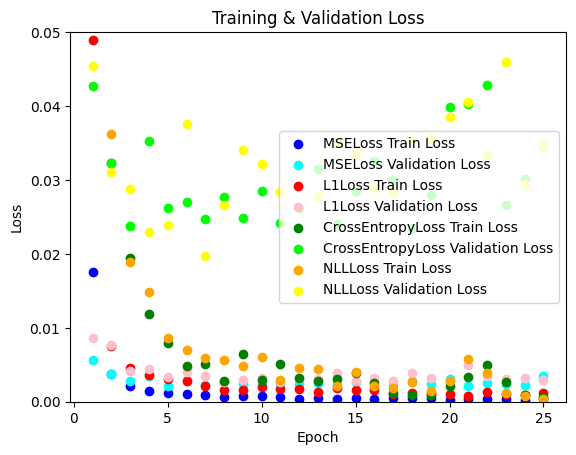

In [ ]:
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.dropout = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(128, 5)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

from tqdm import tqdm
# Training loop
colors = []
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=25):
    train_losses = []
    val_losses = []
    model.train()
    print()
    for _ in tqdm(range(epochs)):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            if isinstance(criterion, (nn.CrossEntropyLoss)):
                loss = criterion(outputs, labels.long())
            elif isinstance(criterion, (nn.NLLLoss)):
                outputs = torch.log_softmax(outputs, dim=1)
                loss = criterion(outputs, labels.long())
            else:
                outputs = torch.softmax(outputs, dim=1)
                labels_one_hot = nn.functional.one_hot(labels.long(), num_classes=outputs.shape[1]).float()
                loss = criterion(outputs, labels_one_hot)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                if isinstance(criterion, (nn.CrossEntropyLoss)):
                    loss = criterion(outputs, labels.long())
                elif isinstance(criterion, (nn.NLLLoss)):
                    outputs = torch.log_softmax(outputs, dim=1)
                    loss = criterion(outputs, labels.long())
                else:
                    outputs = torch.softmax(outputs, dim=1)
                    labels_one_hot = nn.functional.one_hot(labels.long(), num_classes=outputs.shape[1]).float()
                    loss = criterion(outputs, labels_one_hot)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        model.train()

    # Plot losses
    plt.scatter(range(1, epochs + 1), train_losses, label=f'{str(criterion)[:-2]} Train Loss', color=colors.pop(0))
    plt.scatter(range(1, epochs + 1), val_losses, label=f'{str(criterion)[:-2]} Validation Loss', color=colors.pop(0))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, 0.05)
    plt.title('Training & Validation Loss')


colors = ['b','cyan','r','pink','g','lime','orange','yellow']
for criterion in [nn.MSELoss(), nn.L1Loss(), nn.CrossEntropyLoss(), nn.NLLLoss()]:
    model = CNN()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_model(model, train_loader, valid_loader, criterion , optimizer)

plt.legend()
plt.show()

100%|██████████| 25/25 [06:25<00:00, 15.40s/it]


100%|██████████| 25/25 [06:19<00:00, 15.18s/it]


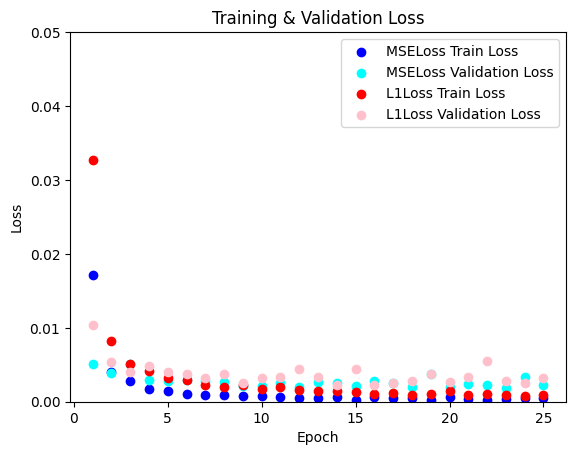

In [ ]:
colors = ['b','cyan','r','pink']
for criterion in [nn.MSELoss(), nn.L1Loss()]:
    model = CNN()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_model(model, train_loader, valid_loader, criterion , optimizer)
plt.legend()
plt.show()

In [ ]:
def test_model(model, test_loader, criterion=nn.MSELoss()):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            if isinstance(criterion, (nn.CrossEntropyLoss)):
                loss = criterion(outputs, labels.long())
            elif isinstance(criterion, (nn.NLLLoss)):
                outputs = torch.log_softmax(outputs, dim=1)
                loss = criterion(outputs, labels.long())
            else:
                outputs = torch.softmax(outputs, dim=1)
                # print(outputs.shape, labels.shape)
                labels_one_hot = nn.functional.one_hot(labels.long(), num_classes=outputs.shape[1]).float()
                loss = criterion(outputs, labels_one_hot)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += len(labels)
            correct += (predicted == labels).sum()
    
    accuracy = 100 * correct / total
    print(f'MSE Loss: {test_loss / len(test_loader)}, Test Accuracy: {accuracy}%')

100%|██████████| 20/20 [05:04<00:00, 15.25s/it]


MSE Loss: 0.0016402521535116203, Test Accuracy: 99.43855285644531%


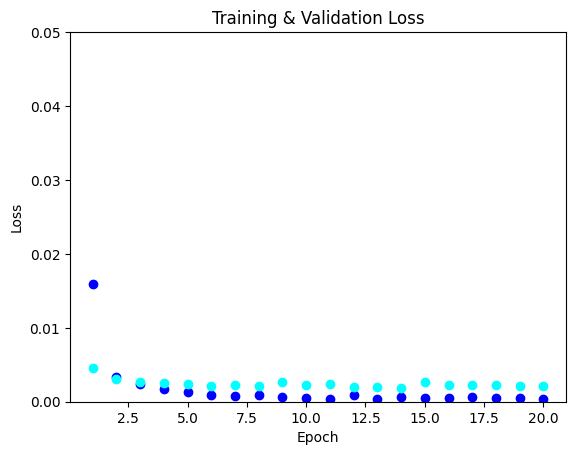

In [ ]:
model = CNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
colors = ['b','cyan']
train_model(model, train_loader, valid_loader, criterion, optimizer, epochs=20)
test_model(model, test_loader, criterion)

adding dropout extended training length but made for better models. I assumed cross entropy loss would be better than L1 or L2 loss since this data should be considered categorical. An incorrect 4 label is not more incorrect than a 2 label on a ground truth 0 label image. I was wrong about this assumption as L2 loss performed the best. Perhaps training needs to be tuned more for cross entropy, but this assignment is for L1/L2 loss.